# 👩‍💻 Activité 2 : entrainement de modèles de régression

<img src="https://cdn.pixabay.com/photo/2012/04/18/12/46/graph-36929_1280.png" alt="rubik" width="400"/>

#### [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management

### Code pour indiquer l'importance des notions traitées dans cette activité

- #### 🥇 : connaissance fondamentale pour l'analyse de données
- #### 🥈 : connaissance importante pour l'analyse de données
- #### 🥉 : connaissance moins importante pour l'analyse de données
> Si rien n'est indiqué, il s'agit de connaissances fondamentales pour l'analyse de données

## 🔍 Recherche d'informations

En recherchant sur le web, trouver les réponses aux questions suivantes :

### - Citer différents modèles simples de régression
___
- Régression linéaire
- Régression Ridge, Lasso et ElasticNet
- [Arbres de décision](https://scikit-learn.org/stable/modules/tree.html#regression)
- [K plus proches voisins](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression)
- [Support Vector Regression (SVR)](https://scikit-learn.org/stable/modules/svm.html#regression)
- ...
___
### - Citer différents modèles ensemblistes de régression
___
- [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)
- [Gradient Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting)
- ...
___

## ✏️ Activités

- Récupérer les données pré-traitées du module `dvfprep`

In [1]:
import dvfprep
import pandas as pd

In [2]:
df = dvfprep.run()
df

Nombre de lignes supprimées : 0
Il n'y a pas de données manquantes dans le dataframe


,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,type_local,jour_semaine,jours_depuis_achat
0,229000.0,64.0,2.0,5.791164,45.139141,Appartement,4,339
4,151500.0,54.0,2.0,5.711105,45.181912,Appartement,1,342
6,62000.0,66.0,3.0,5.702079,45.144146,Appartement,0,343
7,110000.0,65.0,4.0,5.766423,45.183840,Appartement,4,339
9,157000.0,100.0,5.0,5.708358,45.173086,Appartement,0,336
...,...,...,...,...,...,...,...,...
5816,416901.0,150.0,4.0,5.615595,45.550246,Maison,2,166
5817,416901.0,48.0,3.0,5.615595,45.550246,Maison,2,166
5818,416901.0,150.0,4.0,5.615595,45.550246,Maison,2,166
5819,416901.0,48.0,3.0,5.615595,45.550246,Maison,2,166


- Vérifier qu'il n'y a **pas de données manquantes** dans le dataframe

In [3]:
df.isna().sum()

valeur_fonciere              0
surface_reelle_bati          0
nombre_pieces_principales    0
longitude                    0
latitude                     0
type_local                   0
jour_semaine                 0
jours_depuis_achat           0
dtype: int64

- Séparer la colonne de la **valeur cible "valeur_fonciere" (noté y)**, des **autres colonnes (notés X)**. Grâce à la fonction [sklearn.model_selection.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), mettre de côté le jeu de données de test avec **20% des données**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop("valeur_fonciere", axis=1)
y = df["valeur_fonciere"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape X_train : {X_train.shape}")
print(f"Shape y_train : {y_train.shape}")
print(f"Shape X_test : {X_test.shape}")
print(f"Shape y_test : {y_test.shape}")

Shape X_train : (1517, 7)
Shape y_train : (1517,)
Shape X_test : (380, 7)
Shape y_test : (380,)


⚠️ A partir de maintenant, le jeu de **données de test ne doit plus être modifié**. Il servira à **évaluer le modèle après l'entrainement**

### 🗺️ Analyse exploratoire des données - Données aberrantes

- Analyser **statistiquement** et **graphiquement** de manière **univariée** les **données d'entrainement**. Conclure sur la présence de **données aberrantes**

In [9]:
import matplotlib.pyplot as plt

In [10]:
X_train.describe()

,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,jour_semaine,jours_depuis_achat
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,73.830587,3.201714,5.746833,45.214695,1.879367,251.851022
std,39.531270,1.502916,0.182261,0.132500,1.475598,51.661474
min,10.000000,0.000000,4.808242,44.740912,0.000000,165.000000
25%,47.000000,2.000000,5.682059,45.161267,1.000000,201.000000
50%,68.000000,3.000000,5.727845,45.189320,2.000000,256.000000
75%,93.000000,4.000000,5.837429,45.305001,3.000000,292.000000
max,313.000000,10.000000,6.170667,45.837253,5.000000,343.000000


In [11]:
y_train.describe()

count    1.517000e+03
mean     2.355645e+05
std      2.073420e+05
min      1.000000e+00
25%      1.100000e+05
50%      1.755800e+05
75%      3.048000e+05
max      1.850000e+06
Name: valeur_fonciere, dtype: float64

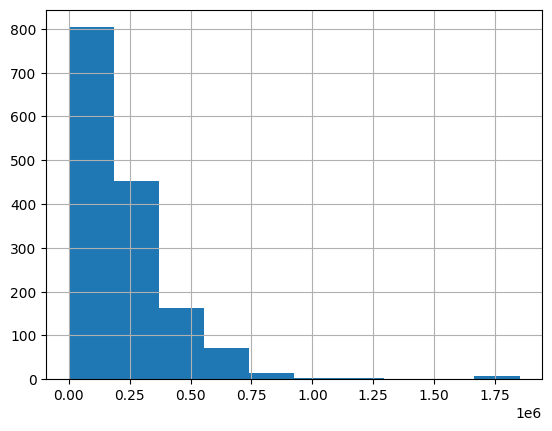

In [12]:
y_train.hist()
plt.show()

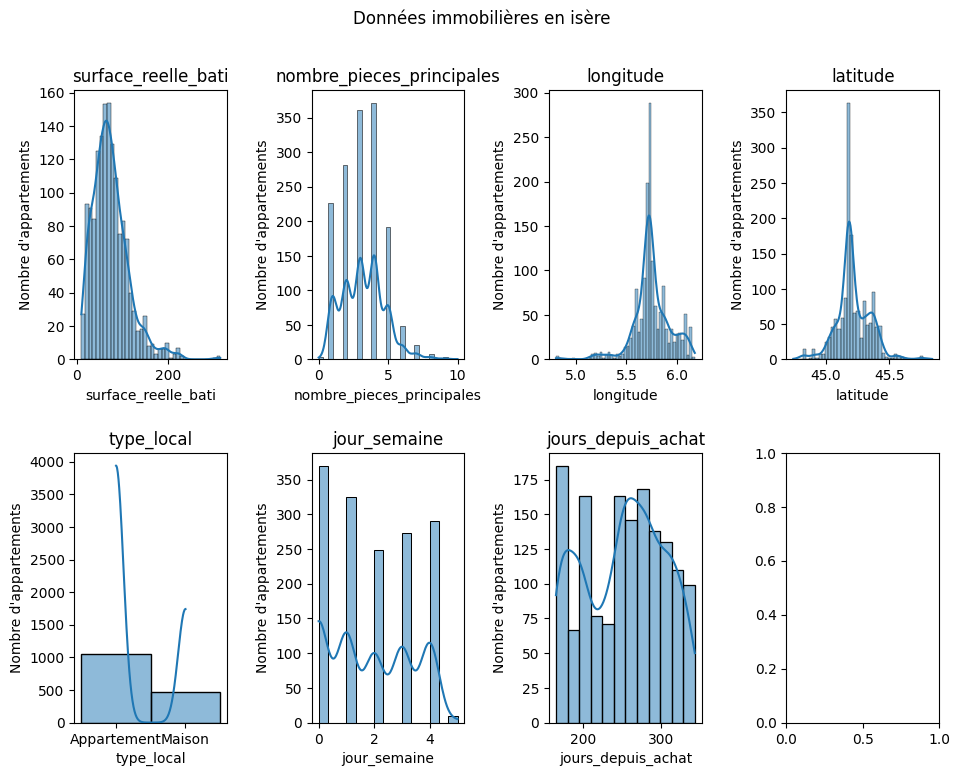

In [13]:
import seaborn as sns

def create_hist(df):
    fig, axs = plt.subplots(2, 4, figsize=(10, 8))
    for ax, col in zip(axs.ravel(), df.columns):
        sns.histplot(df, x=col, kde=True, ax=ax)
        ax.set_title(col)
        ax.set(xlabel=col, ylabel="Nombre d'appartements")
    fig.suptitle("Données immobilières en isère")
    fig.tight_layout(pad=2)
    plt.show()
create_hist(X_train)

- Effectuer une **analyse bivariée graphique** grâce à la carte de chaleur (heatmap) des corrélations

C:\Users\PLB\AppData\Local\Temp\ipykernel_18852\4179918966.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.concat([X_train, y_train], axis=1).corr(method="pearson"), annot=True)


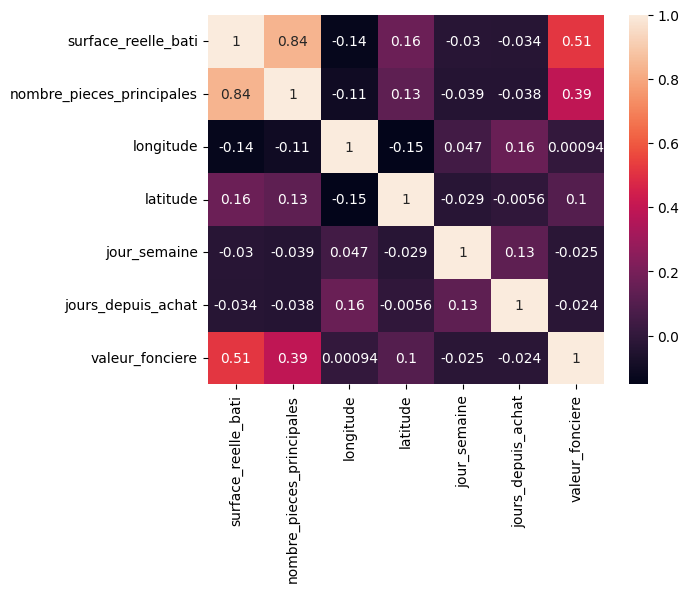

In [14]:
sns.heatmap(pd.concat([X_train, y_train], axis=1).corr(method="pearson"), annot=True)
plt.show()

- Compléter la fonction Python suivante **`remove_0_room()`** pour qu'elle retourne le **dataframe** sans les données où la colonne "nombre_pieces_principales" vaut 0

In [15]:
def remove_0_room(X_train: pd.DataFrame, y_train: pd.Series) -> tuple[pd.DataFrame, pd.Series]:
    """
    Renvoie les données X_train et y_train modifiées sans les logements sans pièce principale
        Parameters:
                X_train (pandas.DataFrame): caractéristiques d'entrainement
                y_train (pandas.Series): valeurs cibles d'entrainement
        Returns:
                X_train, y_train tuple[pd.DataFrame, pd.Series]: données X_train et y_train modifiées
    """
    df = pd.concat([X_train, y_train], axis=1)
    df = df[df["nombre_pieces_principales"]!=0]
    return df.drop("valeur_fonciere", axis=1), df["valeur_fonciere"]

In [16]:
X_train, y_train = remove_0_room(X_train, y_train)

- Compléter la fonction Python suivante **`remove_outlier_price_m2()`** pour qu'elle retourne le **dataframe** dont le prix au mètre carré est compris entre 500€ et 12 000€

In [17]:
def remove_outlier_price_m2(X_train: pd.DataFrame, y_train: pd.Series) -> tuple[pd.DataFrame, pd.Series]:
    """
    Renvoie les données X_train et y_train modifiées sans les logements dont le prix au mètre carré est inférieur à 500€ ou
    supérieur à 12 000€
        Parameters:
                X_train (pandas.DataFrame): caractéristiques d'entrainement
                y_train (pandas.Series): valeurs cibles d'entrainement
        Returns:
                X_train, y_train tuple[pd.DataFrame, pd.Series]: données X_train et y_train modifiées
    """
    df = pd.concat([X_train, y_train], axis=1)
    df["prix_m2"] = df["valeur_fonciere"] / df["surface_reelle_bati"]
    df = df[df["prix_m2"]>500]
    df = df[df["prix_m2"]<12000]
    df = df.drop("prix_m2", axis=1)
    return df.drop("valeur_fonciere", axis=1), df["valeur_fonciere"]

In [18]:
X_train, y_train = remove_outlier_price_m2(X_train, y_train)

- Compléter la fonction Python suivante **`remove_outlier_2_zscore()`** pour qu'elle retourne le **dataframe** dont le prix au mètre carré est compris entre -2 et +2 zscores

In [19]:
def remove_outlier_2_zscore(X_train: pd.DataFrame, y_train: pd.Series) -> tuple[pd.DataFrame, pd.Series]:
    """
    Renvoie les données X_train et y_train modifiées sans les logements dont le prix au mètre carré est 
    compris entre -2 et +2 zscores
        Parameters:
                X_train (pandas.DataFrame): caractéristiques d'entrainement
                y_train (pandas.Series): valeurs cibles d'entrainement
        Returns:
                X_train, y_train tuple[pd.DataFrame, pd.Series]: données X_train et y_train modifiées
    """
    df = pd.concat([X_train, y_train], axis=1)
    df["prix_m2"] = df["valeur_fonciere"] / df["surface_reelle_bati"]
    df = df[((df["prix_m2"] - df["prix_m2"].mean()) / df["prix_m2"].std()).abs()<2]
    df = df.drop("prix_m2", axis=1)
    return df.drop("valeur_fonciere", axis=1), df["valeur_fonciere"]

In [21]:
X_train, y_train = remove_outlier_2_zscore(X_train, y_train)

In [25]:
X_train

,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,type_local,jour_semaine,jours_depuis_achat
934,149.0,4.0,5.820281,45.200311,Appartement,4,318
4263,51.0,2.0,5.327319,45.114609,Maison,1,181
3620,63.0,3.0,5.683656,45.220321,Appartement,1,237
2598,39.0,2.0,5.683656,45.220321,Appartement,3,249
3754,56.0,2.0,5.732839,45.167612,Appartement,4,227
...,...,...,...,...,...,...,...
3292,23.0,1.0,6.123750,45.006034,Appartement,3,256
3914,74.0,2.0,5.730119,45.182896,Appartement,3,214
2377,30.0,1.0,5.727833,45.188551,Appartement,3,256
4333,95.0,5.0,5.990255,45.460713,Maison,2,201


### 👷 Création du pipeline de pré-traitement

- Créer une liste pour les **caractéristiques numériques** et une liste pour la **caractéristique catégorielle**

In [ ]:
# A COMPLETER

- Créer un **pipeline de pré-traitement** avec une transformation de **RobustScaler()** sur les données **numériques** et une transformation de **OneHotEncoder()** sur les données **catégorielles**

> ℹ️ les fonctions suivantes peuvent être utiles :
> - [Column Transformer with Mixed Types](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)
> - [sklearn.compose.ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer)
> - [sklearn.preprocessing.RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)
> - [sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [ ]:
# A COMPLETER

### 👷 Création du pipeline d'entrainement et évaluation du modèle

- Créer un pipeline **global** de **pré-traitement** et **d'entrainement** d'un modèle de **régression linéaire**

> ℹ️ les fonctions suivantes peuvent être utiles :
> - [sklearn.pipeline.Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline)
> - [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# A COMPLETER

- **Entrainer** le modèle grâce au **pipeline**. **Evaluer le modèle** grâce au jeu de **test**

In [ ]:
# A COMPLETER

### 🧪 Test de différents modèles et optimisation des hyperparamètres

- Créer un pipeline avec un **arbre de décision** et **comparer** les résultats avec **la régression linéaire**

> ℹ️ les fonctions suivantes peuvent être utiles :
> - [sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [ ]:
# A COMPLETER

- Créer un pipeline avec un modèle de **random forest** et **comparer** les résultats avec les modèles précédents

> ℹ️ les fonctions suivantes peuvent être utiles :
> - [sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [ ]:
# A COMPLETER

- Effectuer une **recherche par grille (grid search)** sur le pipeline du modèle de **random forest**. Essayer différentes valeurs pour les paramètres "n_estimators" et "max_depth". Afficher le R2 maximum en validation croisée et les meilleurs hyperparamètres

> ℹ️ les fonctions suivantes peuvent être utiles :
> - [sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
> - [Putting it all together](https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html)
> - [sklearn.model_selection.GridSearchCV](sklearn.model_selection.GridSearchCV)

In [ ]:
# A COMPLETER

- **comparer** les résultats du meilleur modèle avec les modèles précédents grâce au paramètre "best_estimator_"

In [ ]:
# A COMPLETER

### 🚢 Exporter le modèle

- **Sauvegarder (serialiser) le meilleur pipeline** dans un fichier joblib grâce à la fonction `joblib.dump()`

> ℹ️ les fonctions suivantes peuvent être utiles :
> - [Model persistence](https://scikit-learn.org/stable/model_persistence.html)

In [ ]:
# A COMPLETER

## 🚀 Pour aller plus loin

- [Regression Trees, Clearly Explained!!!](https://www.youtube.com/watch?v=g9c66TUylZ4&t=1s)
- [StatQuest: Random Forests Part 1 - Building, Using and Evaluating](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ)

___
*👨‍🏫 [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management*
___
Source images d'illustration : Image par Clker-Free-Vector-Images de Pixabay